In [1]:
import os
os.chdir('../..')
!ls

product_impacts


In [2]:
import os.path
import pandas as pd
import numpy as np
import pickle
import json
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc

sns.set()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
lev0 = pd.read_csv('../../future_of_food/NDNS UK/predictions/predictions_lev0_manuallabels_nonHI_RF_withcorrections_14Oct2024.csv')
bev = pd.read_csv('../../future_of_food/NDNS UK/predictions/predictions_bev_lev2_manuallabels_nonHI_RF_15Oct2024.csv')
cereals = pd.read_csv('../../future_of_food/NDNS UK/predictions/predictions_cereals_lev2_manuallabels_nonHI_RF_15Oct2024.csv')
eggs = pd.read_csv('../../future_of_food/NDNS UK/predictions/predictions_egg_lev2_manuallabels_nonHI_RF_15Oct2024.csv')
fats = pd.read_csv('../../future_of_food/NDNS UK/predictions/predictions_fats_lev2_manuallabels_nonHI_RF_15Oct2024.csv')
fish = pd.read_csv('../../future_of_food/NDNS UK/predictions/predictions_fish_lev2_manuallabels_nonHI_RF_15Oct2024.csv')
fruit = pd.read_csv('../../future_of_food/NDNS UK/predictions/predictions_fruit_lev2_manuallabels_nonHI_RF_15Oct2024.csv')
meat = pd.read_csv('../../future_of_food/NDNS UK/predictions/predictions_meat_lev2_manuallabels_nonHI_RF_15Oct2024.csv')
milk = pd.read_csv('../../future_of_food/NDNS UK/predictions/predictions_milk_lev2_manuallabels_nonHI_RF_15Oct2024.csv')
misc = pd.read_csv('../../future_of_food/NDNS UK/predictions/predictions_misc_lev2_manuallabels_nonHI_RF_15Oct2024.csv')
sugar = pd.read_csv('../../future_of_food/NDNS UK/predictions/predictions_sugar_lev2_manuallabels_nonHI_RF_15Oct2024.csv')
veg = pd.read_csv('../../future_of_food/NDNS UK/predictions/predictions_veg_lev2_manuallabels_nonHI_RF_15Oct2024.csv')

In [4]:
lev0.shape

(262711, 11)

In [5]:
lev0 = lev0[lev0['parentcategory_pred'].isin(['Alcoholic Beverages', 'Savoury Snacks', 'Nuts and Seeds',
                                              'Not Food', 'Commercial Toddlers Foods and Drinks',
                                              'Dietary Supplements', 'Artificial Sweeteners'])]

lev0['mainfoodgroup_pred'] = lev0['parentcategory_pred']
lev0['subfoodgroup_pred'] = lev0['parentcategory_pred']

all_preds = pd.concat([lev0, bev, cereals, eggs, fats, fish, fruit, meat, milk, misc, sugar, veg], ignore_index=True)

all_preds.shape

(262711, 13)

In [6]:
all_preds = all_preds.sort_values(by=['parentcategory_pred', 'mainfoodgroup_pred', 'subfoodgroup_pred', 'product_list_name']).reset_index(drop=True)

In [7]:
all_preds['parentcategory_pred'].value_counts()

Cereals and Cereal Products             52426
Miscellaneous                           27598
Meat and Meat Products                  26837
Non-Alcoholic Beverages                 25994
Sugar, Preserves and Confectionery      25822
Vegetables, Potatoes                    23757
Milk and Milk Products                  23239
Alcoholic Beverages                     15150
Fish and Fish Dishes                     9302
Fruit                                    7343
Savoury Snacks                           6460
Not Food                                 5086
Nuts and Seeds                           5057
Fat Spreads                              3811
Commercial Toddlers Foods and Drinks     2488
Eggs and Egg Dishes                      1315
Dietary Supplements                       622
Artificial Sweeteners                     404
Name: parentcategory_pred, dtype: int64

In [8]:
all_preds['mainfoodgroup_pred'].value_counts()

Miscellaneous                                                    27598
Vegetables                                                       20857
Pasta, rice and other miscellaneous cereals                      15966
Alcoholic Beverages                                              15150
Chocolate confectionery                                          13767
Biscuits                                                         13742
Tea, coffee and water                                             8500
Buns, cakes, pastries and fruit pies                              8409
Yogurt, fromage frais and other dairy desserts                    7547
Soft drinks, not diet                                             7452
Chicken and turkey dishes                                         7359
Fruit                                                             7343
Bread                                                             7055
Cheese                                                            6509
Savour

In [9]:
all_preds['subfoodgroup_pred'].value_counts()

Savoury sauces pickles gravies & condiments                      22799
Alcoholic Beverages                                              15150
Chocolate confectionery                                          13767
Biscuits                                                         13742
Buns cakes and pastries                                           8126
Pasta                                                             7507
Other chicken and turkey                                          7359
Savoury Snacks                                                    6460
Yogurt                                                            6166
Sugar confectionery                                               5713
Soft drinks not low calorie carbonated                            5420
Other fruit not canned                                            5177
Not Food                                                          5086
Nuts and Seeds                                                    5057
Other 

Text(0.5, 1.0, 'sub category - predicted')

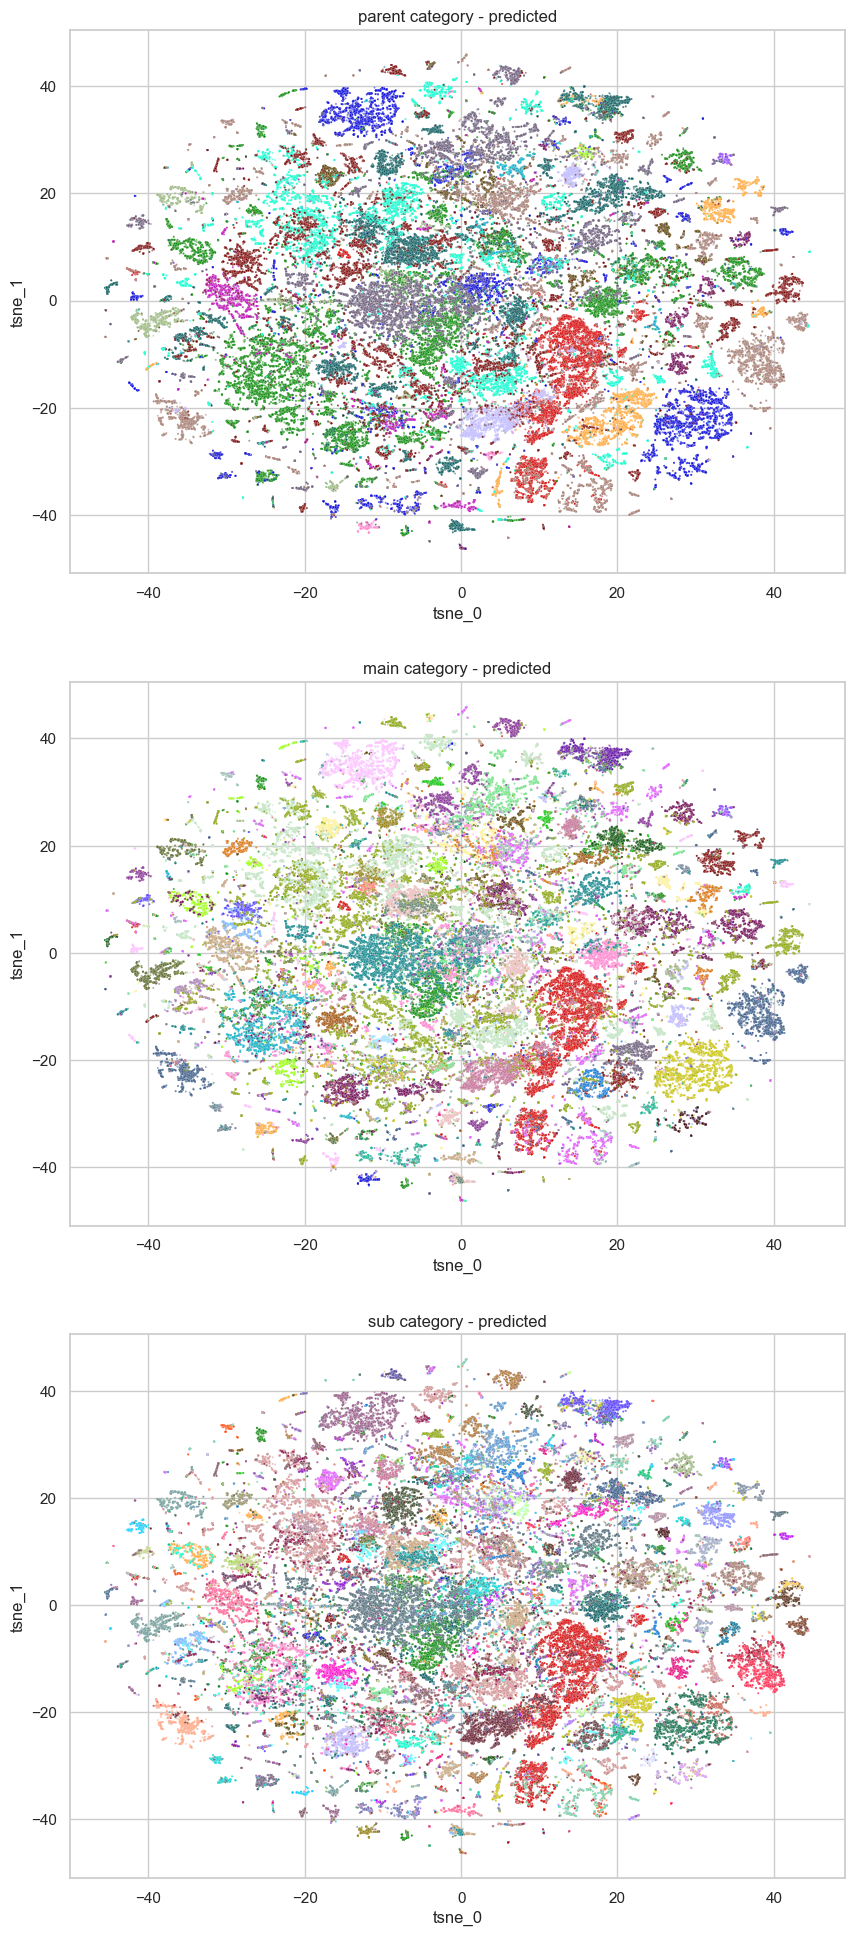

In [4]:
sns.set_style('whitegrid')
figure, axes = plt.subplots(3, 1, figsize=(10, 24))

sns.scatterplot(
    data=all_preds,
    x='tsne_0', y='tsne_1',
    hue='parentcategory_pred',
    palette=sns.color_palette(cc.glasbey, n_colors=all_preds['parentcategory_pred'].nunique()),
    legend=False,
    alpha=0.5,
    ax = axes[0],
    s=2
).set_title('parent category - predicted')

sns.scatterplot(
    data=all_preds,
    x='tsne_0', y='tsne_1',
    hue='mainfoodgroup_pred',
    palette=sns.color_palette(cc.glasbey, n_colors=all_preds['mainfoodgroup_pred'].nunique()),
    legend=False,
    alpha=0.5,
    ax = axes[1],
    s=2
).set_title('main category - predicted')

sns.scatterplot(
    data=all_preds,
    x='tsne_0', y='tsne_1',
    hue='subfoodgroup_pred',
    palette=sns.color_palette(cc.glasbey, n_colors=all_preds['subfoodgroup_pred'].nunique()),
    legend=False,
    alpha=0.5,
    ax = axes[2],
    s=2
).set_title('sub category - predicted')

In [12]:
all_preds.columns

Index(['product_id', 'product_name', 'product_list_name', 'store',
       'ingredients_text', 'parentcategory_lab', 'mainfoodgroup_lab',
       'subfoodgroup_lab', 'parentcategory_pred', 'tsne_0', 'tsne_1',
       'mainfoodgroup_pred', 'subfoodgroup_pred'],
      dtype='object')

In [13]:
cols = ['product_id', 'product_name', 'product_list_name', 'store',
       'ingredients_text', 'parentcategory_lab', 'mainfoodgroup_lab',
       'subfoodgroup_lab', 'parentcategory_pred', 'mainfoodgroup_pred', 
       'subfoodgroup_pred', 'tsne_0', 'tsne_1']

all_preds[cols].to_csv('../../future_of_food/NDNS UK/predictions/all_predictions_15Oct2024.csv', index=False)